<a href="https://colab.research.google.com/github/Armaan8/EDA/blob/main/22BDS0317.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Exploratory Data Analysis (EDA) on the Mroz Dataset

Registration Number: 22BDS0317

Name: Armaan Sharma

Faculty Name: Dr. Prakash M

Objective: This notebook performs a detailed Exploratory Data Analysis on the mroz.csv dataset. The analysis covers initial data exploration, cleaning, and a full analysis using univariate, bivariate, and multivariate techniques to uncover key insights.

## 1. Project Setup and Initial Data Exploration
The initial phase of any data project involves setting up the environment, loading the data, and performing an initial inspection to understand its structure and content.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('mroz.csv')

#### Display the dataset's initial dimensions

In [38]:
print("Initial Dataset Dimensions:", df.shape)

Initial Dataset Dimensions: (753, 23)


#### Show the first 5 rows to get a quick preview of the data

In [39]:
df.head()

,rownames,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1,1610,1,0,32,12,3.3540,2.65,2708,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,2,1,1656,0,2,30,12,1.3889,2.65,2310,...,21800,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,3,1,1980,1,3,35,12,4.5455,4.04,3072,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,4,1,456,0,3,34,12,1.0965,3.25,1920,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,5,1,1568,1,2,31,14,4.5918,3.60,2000,...,27300,0.6215,12,14,9.5,1,7,20.100058,1.524272,49


#### Get a concise summary of the DataFrame's column types and non-null values

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  753 non-null    int64  
 1   inlf      753 non-null    int64  
 2   hours     753 non-null    int64  
 3   kidslt6   753 non-null    int64  
 4   kidsge6   753 non-null    int64  
 5   age       753 non-null    int64  
 6   educ      753 non-null    int64  
 7   wage      428 non-null    float64
 8   repwage   753 non-null    float64
 9   hushrs    753 non-null    int64  
 10  husage    753 non-null    int64  
 11  huseduc   753 non-null    int64  
 12  huswage   753 non-null    float64
 13  faminc    753 non-null    int64  
 14  mtr       753 non-null    float64
 15  motheduc  753 non-null    int64  
 16  fatheduc  753 non-null    int64  
 17  unem      753 non-null    float64
 18  city      753 non-null    int64  
 19  exper     753 non-null    int64  
 20  nwifeinc  753 non-null    float6

#### Generate a statistical summary of the numerical columns

In [41]:
df.describe()

,rownames,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,428.000000,753.000000
mean,377.000000,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,4.177682,1.849734,2267.270916,...,23080.594954,0.678863,9.250996,8.808765,8.623506,0.642762,10.63081,20.128964,1.190173,178.038513
std,217.516666,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.310282,2.419887,595.566649,...,12190.202026,0.083496,3.367468,3.572290,3.114934,0.479504,8.06913,11.634797,0.723198,249.630849
min,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,...,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000,-0.029057,-2.054164,0.000000
25%,189.000000,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,...,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000,13.025040,0.816509,16.000000
50%,377.000000,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,...,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000,17.700001,1.247574,81.000000
75%,565.000000,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,...,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000,24.466000,1.603571,225.000000
max,753.000000,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,...,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000,96.000000,3.218876,2025.000000


## 2. Data Cleaning and Handling
This section addresses data quality issues identified during initial exploration. The goal is to prepare the data for robust statistical analysis.

#### The 'rownames' column appears to be an extraneous index, which will be dropped.

In [42]:
df.drop(columns=['rownames'], inplace=True)

#### A wage of '0' indicates that a woman is not in the labor force, which is a form of missing data.
#### First, I will count the number of '0' values in the relevant columns to quantify the issue.

In [43]:
print("Count of '0' values (missing wages) before cleaning:")
print("Wage:", (df['wage'] == 0).sum())
print("Lwage (log wage):", (df['lwage'] == 0).sum())
print("Repwage (reported wage):", (df['repwage'] == 0).sum())

Count of '0' values (missing wages) before cleaning:
Wage: 0
Lwage (log wage): 4
Repwage (reported wage): 417


#### I will replace these '0' values with NaN to properly handle them as missing data.

In [44]:
df[['wage', 'lwage', 'repwage']] = df[['wage', 'lwage', 'repwage']].replace(0, np.nan)

#### Now, I will impute the missing 'lwage' and 'repwage' values with the mean of their respective columns.
#### The 'wage' column is left untouched as its missing values are tied to a categorical variable ('inlf').

In [45]:
df['lwage'] = df['lwage'].fillna(df['lwage'].mean())
df['repwage'] = df['repwage'].fillna(df['repwage'].mean())

#### The DataFrame information is printed again to confirm the changes after cleaning.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   inlf      753 non-null    int64  
 1   hours     753 non-null    int64  
 2   kidslt6   753 non-null    int64  
 3   kidsge6   753 non-null    int64  
 4   age       753 non-null    int64  
 5   educ      753 non-null    int64  
 6   wage      428 non-null    float64
 7   repwage   753 non-null    float64
 8   hushrs    753 non-null    int64  
 9   husage    753 non-null    int64  
 10  huseduc   753 non-null    int64  
 11  huswage   753 non-null    float64
 12  faminc    753 non-null    int64  
 13  mtr       753 non-null    float64
 14  motheduc  753 non-null    int64  
 15  fatheduc  753 non-null    int64  
 16  unem      753 non-null    float64
 17  city      753 non-null    int64  
 18  exper     753 non-null    int64  
 19  nwifeinc  753 non-null    float64
 20  lwage     753 non-null    float6

## 3. Univariate Analysis
This analysis examines individual variables to understand their distributions, central tendencies, and spread.

#### Analysis of Continuous Variables

Histogram for 'age': Displays the frequency distribution of ages within the dataset.

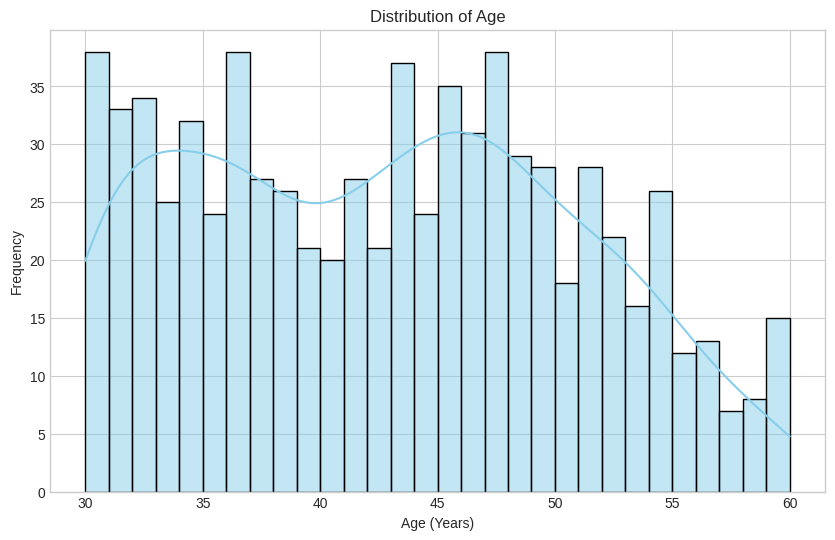

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

Histogram for 'exper': Visualizes the distribution of work experience, identifying the most common experience levels.

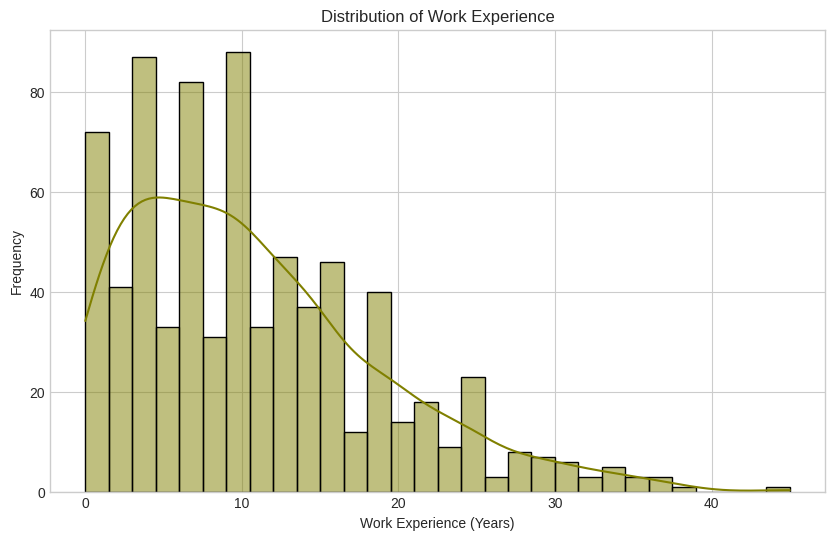

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['exper'], bins=30, kde=True, color='olive')
plt.title('Distribution of Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Frequency')
plt.show()


Boxplot for 'faminc': Provides a visual summary of family income distribution and highlights potential outliers.

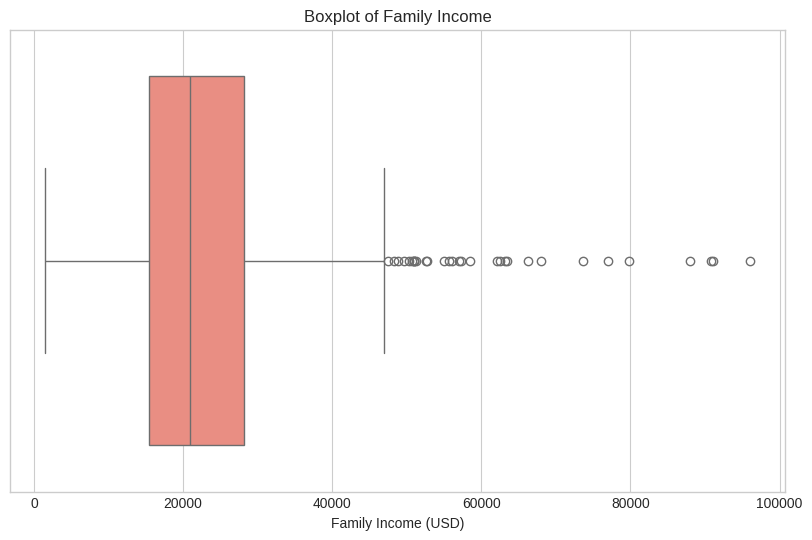

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['faminc'], color='salmon')
plt.title('Boxplot of Family Income')
plt.xlabel('Family Income (USD)')
plt.show()

#### Analysis of Categorical Variables

Count plot for 'inlf': Illustrates the proportion of women in and out of the labor force.

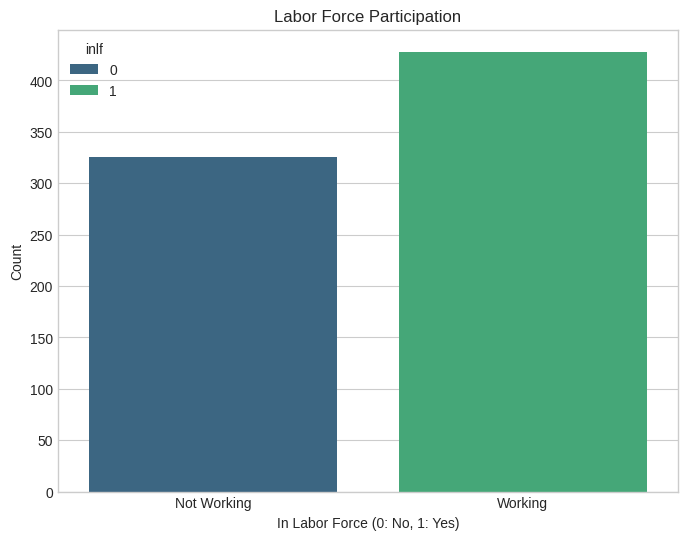

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='inlf', data=df, palette='viridis', hue='inlf')
plt.title('Labor Force Participation')
plt.xlabel('In Labor Force (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Working', 'Working'])
plt.show()

Count plot for 'kidslt6': Shows the distribution of women based on the number of children under the age of

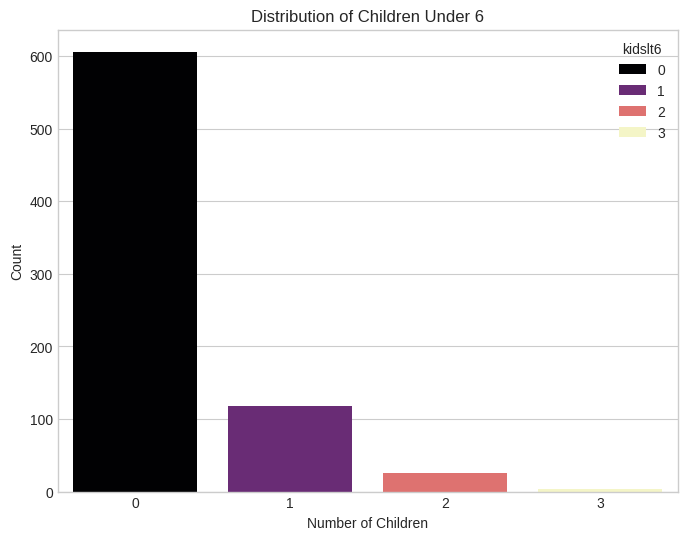

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x='kidslt6', data=df, palette='magma', hue='kidslt6')
plt.title('Distribution of Children Under 6')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

## 4. Bivariate Analysis
This section explores the relationships between pairs of variables to identify correlations and dependencies.

#### Continuous vs. Continuous Relationships

Scatter plot for 'educ' and 'wage': Examines the correlation between years of education and hourly wage.

Correlation between Education and Wage: 0.34195443572422596


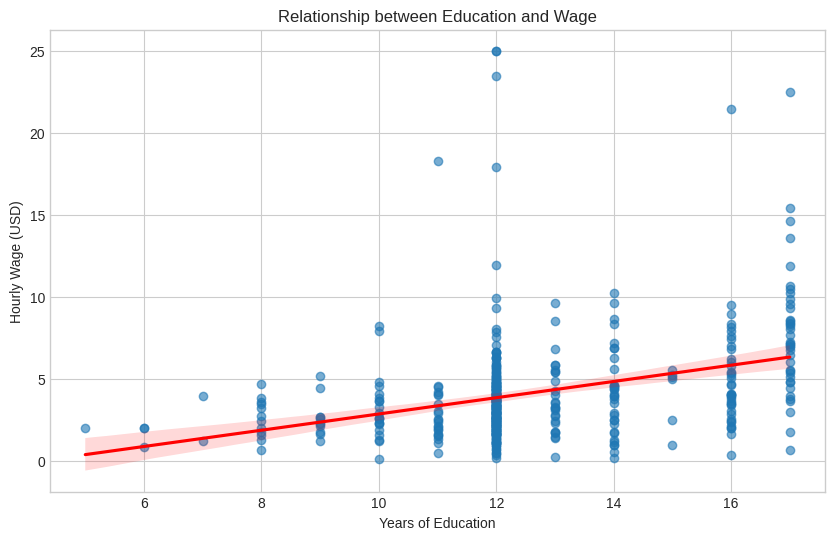

In [54]:
print("Correlation between Education and Wage:", df['educ'].corr(df['wage']))
plt.figure(figsize=(10, 6))
sns.regplot(x='educ', y='wage', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Education and Wage')
plt.xlabel('Years of Education')
plt.ylabel('Hourly Wage (USD)')
plt.show()

Scatter plot for 'exper' and 'wage': Investigates the correlation between work experience and hourly wage.

Correlation between Experience and Wage: 0.0549914951327179


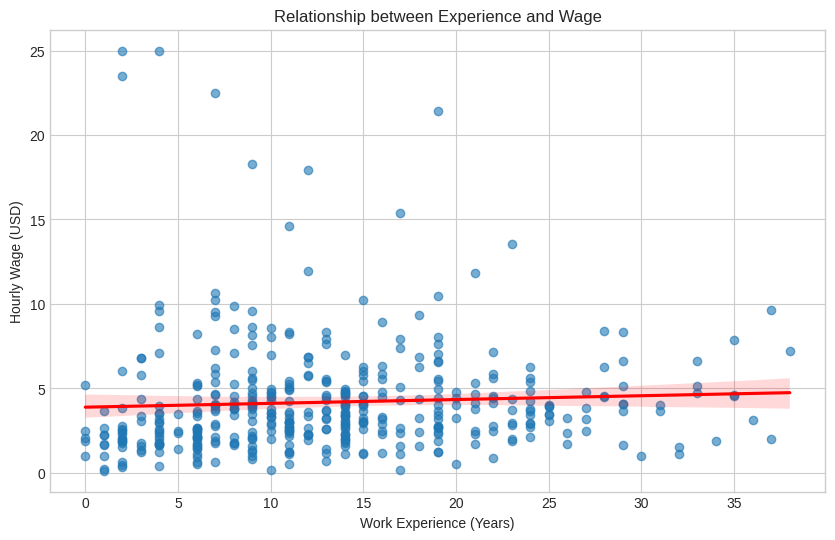

In [56]:
print("Correlation between Experience and Wage:", df['exper'].corr(df['wage']))
plt.figure(figsize=(10, 6))
sns.regplot(x='exper', y='wage', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between Experience and Wage')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Hourly Wage (USD)')
plt.show()

#### Continuous vs. Categorical Relationships

Boxplot for 'inlf' vs. 'faminc': Compares the distribution of family income across labor force participation groups.

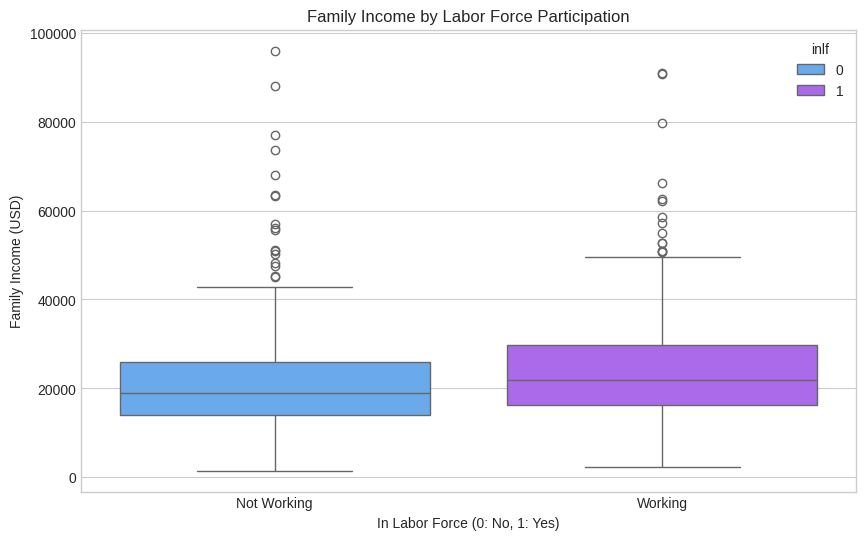

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='inlf', y='faminc', data=df, hue='inlf', palette='cool')
plt.title('Family Income by Labor Force Participation')
plt.xlabel('In Labor Force (0: No, 1: Yes)')
plt.ylabel('Family Income (USD)')
plt.xticks(ticks=[0, 1], labels=['Not Working', 'Working'])
plt.show()

Boxplot for 'educ' vs. 'wage': Provides a detailed view of wage distribution for each education level.

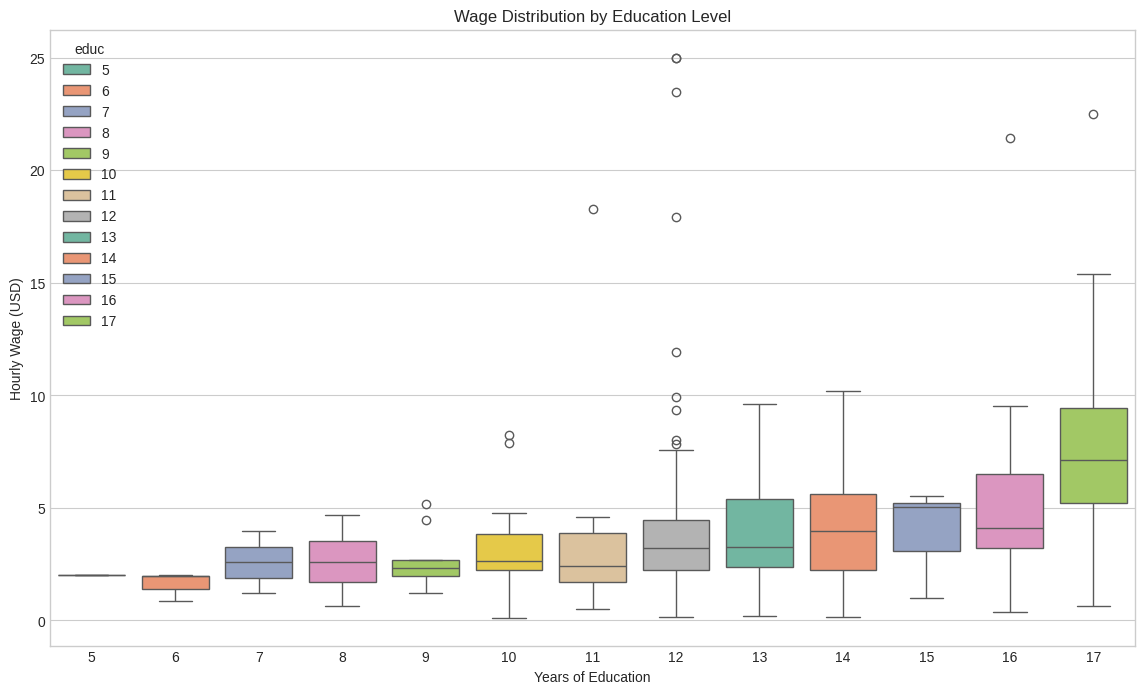

In [66]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='educ', y='wage', data=df, palette='Set2', hue='educ')
plt.title('Wage Distribution by Education Level')
plt.xlabel('Years of Education')
plt.ylabel('Hourly Wage (USD)')
plt.show()

## 5. Multivariate Analysis
This analysis explores the relationships between three or more variables to uncover more complex patterns and interdependencies.

Select key numerical variables for a comprehensive multivariate analysis

In [67]:
selected_vars = ['age', 'educ', 'exper', 'wage', 'faminc', 'huseduc', 'huswage', 'kidslt6', 'kidsge6']

Creating a pair plot to visualize all bivariate relationships and individual distributions.
The pair plot offers a quick and comprehensive view of the dataset's multivariate structure.

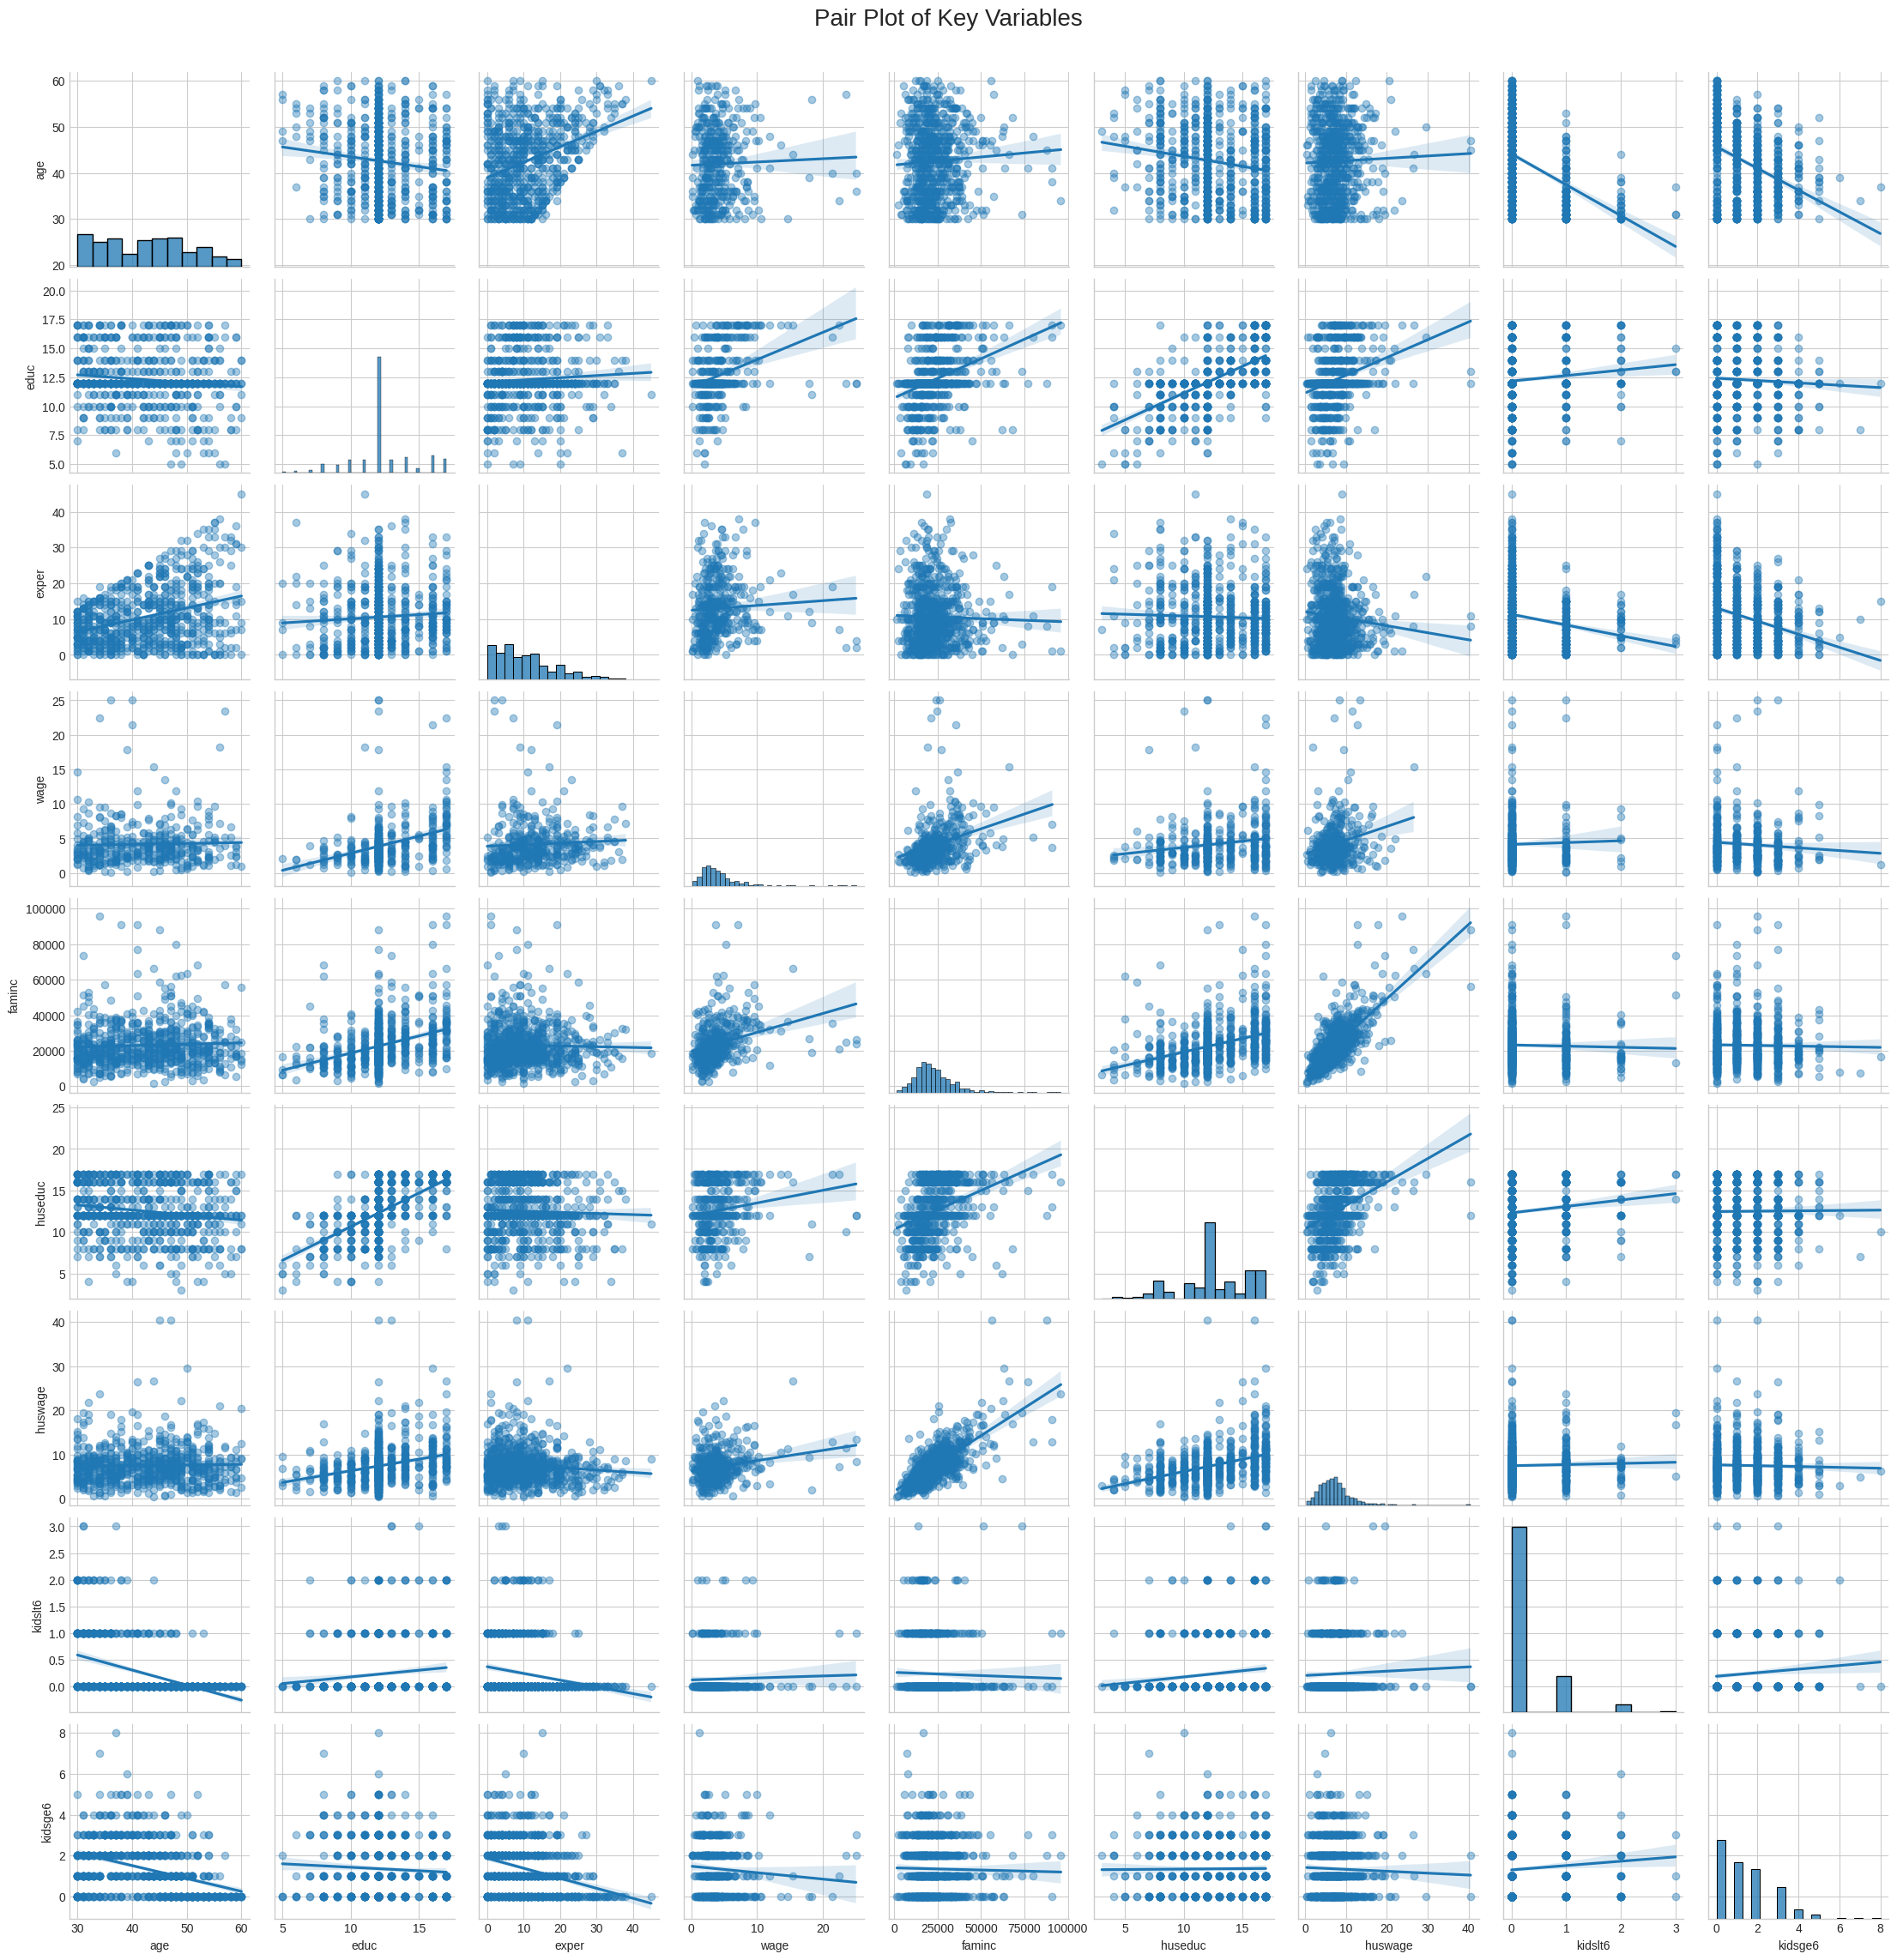

In [68]:
sns.pairplot(df[selected_vars], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.4}})
plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=20)
plt.show()

Creating a correlation heatmap to show all pairwise correlations. This heatmap provides a clear, color-coded summary of the strength and direction of all correlations.

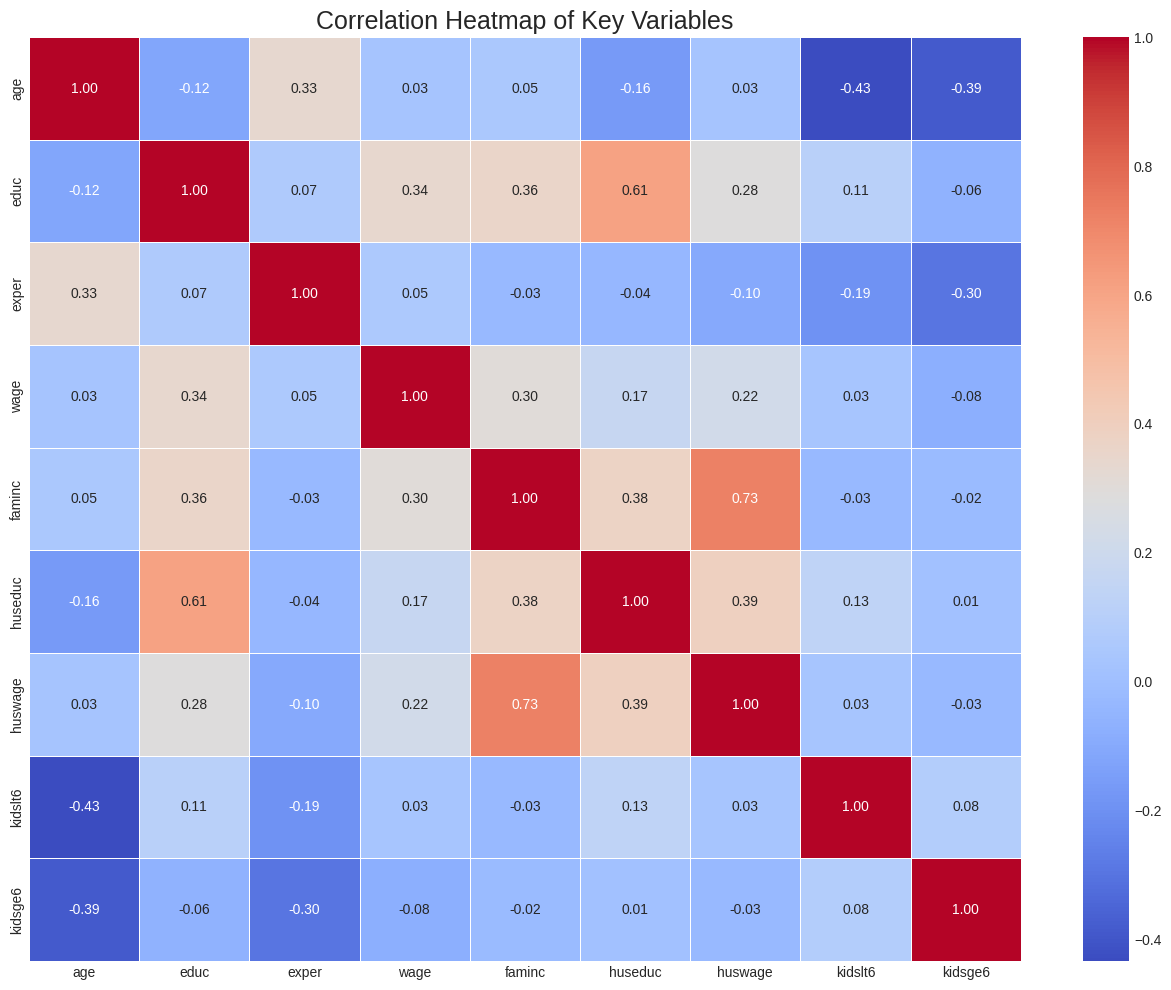

In [69]:
plt.figure(figsize=(16, 12))
numerical_corr = df[selected_vars].corr()
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables', fontsize=18)
plt.show()

## 6. Summary of Findings
#### This final section summarizes the key insights derived from the exploratory data analysis.



1. The dataset required data cleaning to properly handle missing wage data for non-working individuals.

2. A positive correlation exists between education and wage, suggesting higher education levels are associated with higher hourly wages.

3. Work experience also has a positive correlation with wage.

4. The number of young children has a negative correlation with labor force participation, indicating that women with young children are less likely to be in the workforce.

5. The family income distribution is right-skewed, with a small number of households having significantly higher incomes.

6. The pair plot and heatmap provided a comprehensive view of these relationships, confirming individual findings and highlighting other areas for potential modeling.